<a href="https://colab.research.google.com/github/JaiVR/customer_satisfaction_score_prediction/blob/main/Fods_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

#Data Preprocessing and PCA

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features  #Categorical data color is not extracted
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


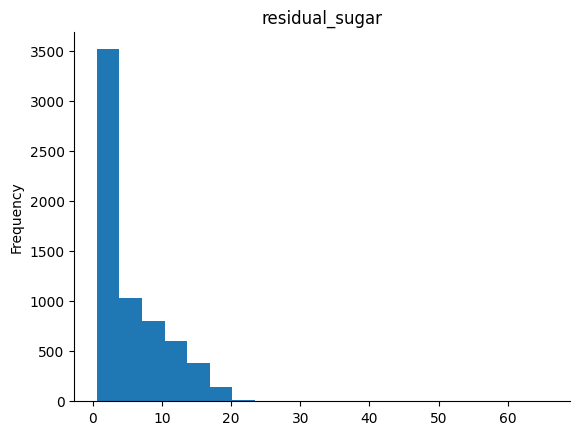

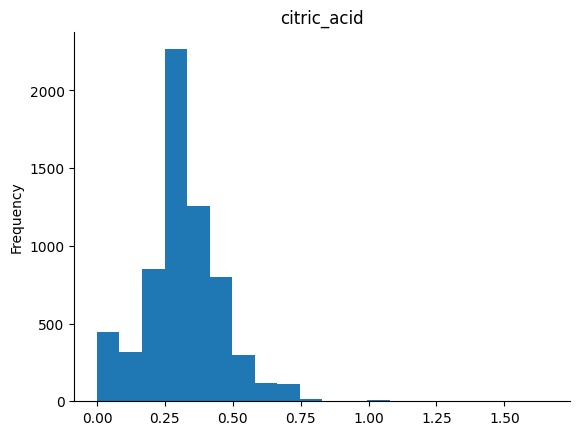

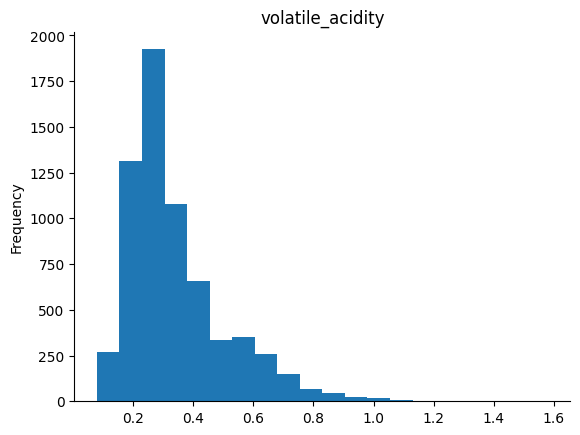

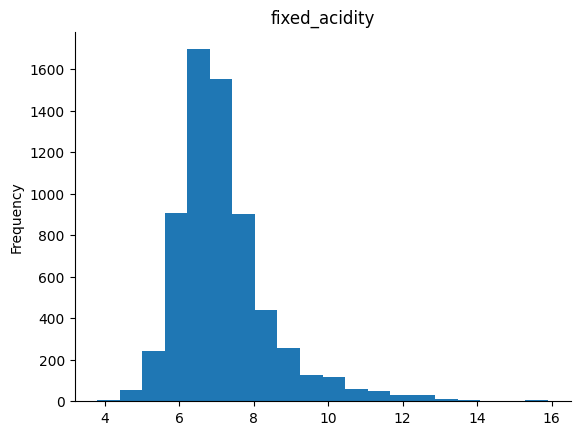

In [ ]:
#Some visualizations

from matplotlib import pyplot as plt

X['residual_sugar'].plot(kind='hist', bins=20, title='residual_sugar')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

X['citric_acid'].plot(kind='hist', bins=20, title='citric_acid')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

X['volatile_acidity'].plot(kind='hist', bins=20, title='volatile_acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

X['fixed_acidity'].plot(kind='hist', bins=20, title='fixed_acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [ ]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [ ]:
X.fillna(0, inplace=True)
print("Any NaN values remaining?", X.isnull().any())

Any NaN values remaining? fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool


<ipython-input-85-21c4f0794b62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [ ]:
y.fillna(0, inplace=True)
print("Any NaN values remaining?", y.isnull().any())

Any NaN values remaining? quality    False
dtype: bool


<ipython-input-86-c740f80171c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)


In [ ]:
#X without pca
Xwp=X
Xwp_n=Xwp.to_numpy()

PCA

PCA Results:
Explained Variance Ratios = [0.2754426  0.22671146 0.14148609]
Cumulative Explained Variance Ratios = [0.2754426  0.50215406 0.64364015]


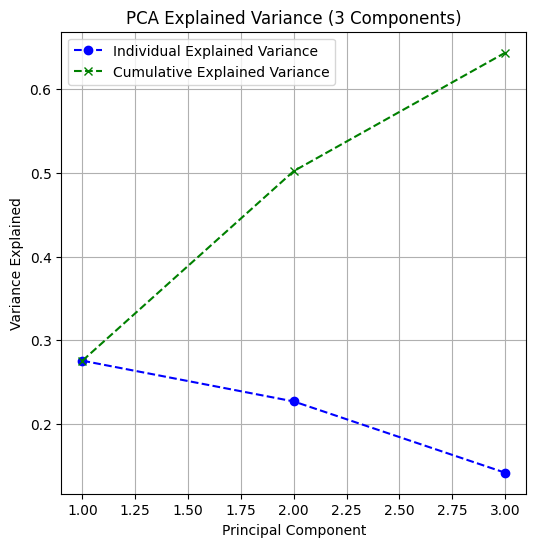

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_stand = scaler.fit_transform(Xwp)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_stand)
#Results
var = pca.explained_variance_ratio_
c_var = var.cumsum()
print("PCA Results:")
print(f"Explained Variance Ratios = {var}")
print(f"Cumulative Explained Variance Ratios = {c_var}")
#Visualization
plt.figure(figsize=(6, 6))
plt.plot(range(1, 4), var, marker='o', linestyle='--', color='b', label='Individual Explained Variance')
plt.plot(range(1, 4), c_var, marker='x', linestyle='--', color='g', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance (3 Components)')
plt.legend()
plt.grid(True)
plt.show()





In [ ]:
#Data Preprocessing and pca complete

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#with customer.csv
dataset = pd.read_csv('customer.csv')
dataset.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,10313,52,Male,Germany,42042,8,1,10,Medium,Bronze,88.38
1,18971,51,Female,Germany,94263,10,3,11,High,Silver,100.00
2,36402,61,Female,Canada,104243,6,6,14,Low,Gold,100.00
3,9290,59,Male,France,67402,2,6,12,Medium,Gold,84.96
4,31855,51,Female,France,102322,7,7,3,High,Bronze,100.00


In [ ]:
#removing customer ID
dataset.drop(columns=['CustomerID'], inplace=True)

In [ ]:
dataset.head()

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,52,Male,Germany,42042,8,1,10,Medium,Bronze,88.38
1,51,Female,Germany,94263,10,3,11,High,Silver,100.00
2,61,Female,Canada,104243,6,6,14,Low,Gold,100.00
3,59,Male,France,67402,2,6,12,Medium,Gold,84.96
4,51,Female,France,102322,7,7,3,High,Bronze,100.00


In [ ]:
dataset.dtypes

,0
Age,int64
Gender,object
Country,object
Income,int64
ProductQuality,int64
ServiceQuality,int64
PurchaseFrequency,int64
FeedbackScore,object
LoyaltyLevel,object
SatisfactionScore,float64


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
#checking missing values
null_counts = dataset.iloc[:, :-1].isnull().sum()
print("Null values in each column of X:\n", null_counts)

Null values in each column of X:
 Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
dtype: int64


In [ ]:
#removing categorical features
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
X_numerical = dataset[numerical_columns].iloc[:, :-1].values
print(X_numerical)

[[    52  42042      8      1     10]
 [    51  94263     10      3     11]
 [    61 104243      6      6     14]
 ...
 [    69  52177      2      4      9]
 [    39  33499     10      6     16]
 [    44  92441      3      1     17]]


#Regression

#Classification

#Clustering

In [ ]:
#dataset after removing catrgorical features, but before PCA

clustering_dataset = dataset.select_dtypes(exclude=['object', 'category'])
clustering_dataset.head()

,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore
0,52,42042,8,1,10,88.38
1,51,94263,10,3,11,100.00
2,61,104243,6,6,14,100.00
3,59,67402,2,6,12,84.96
4,51,102322,7,7,3,100.00


In [ ]:
#applying z-score transformation over the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clustering_dataset = sc.fit_transform(clustering_dataset)

In [ ]:
def beta_cv(X, labels):
    n_clusters = len(np.unique(labels))
    unique_clusters = np.unique(labels)
    # Cohesion: Intra-cluster distances (within-cluster compactness)
    intra_distances = []
    for cluster in unique_clusters:
        points_in_cluster = X[labels == cluster]
        intra_distances.append(np.mean(pdist(points_in_cluster)))
    # Separation: Inter-cluster distances (between-cluster separation)
    inter_distances = []
    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            points_cluster_i = X[labels == unique_clusters[i]]
            points_cluster_j = X[labels == unique_clusters[j]]
            inter_distances.append(np.mean(pairwise_distances(points_cluster_i, points_cluster_j)))
    cohesion = np.mean(intra_distances)
    separation = np.mean(inter_distances)
    return cohesion / separation  # Beta CV = Cohesion / Separation
def dunn_index(X, labels):
    """
    Calculates the Dunn index for a given clustering result.
    Parameters:
        X (array-like): The data points.
        labels (array-like): Cluster labels for each data point.
    Returns:
        float: The Dunn index.
    """
    unique_clusters = np.unique(labels)
    num_clusters = len(unique_clusters)
    max_intracluster_dist = 0.0
    min_intercluster_dist = np.inf
    # Calculate maximum intracluster distance
    for i in unique_clusters:
        cluster_i_points = X[labels == i]
        # Handle clusters with single or no data points
        if len(cluster_i_points) <= 1:
            intracluster_dist = 0  # or any other appropriate value
        else:
            intracluster_dist = np.max(pdist(cluster_i_points))

        if intracluster_dist > max_intracluster_dist:
            max_intracluster_dist = intracluster_dist

    # Calculate minimum intercluster distance
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            cluster_i_points = X[labels == unique_clusters[i]]
            cluster_j_points = X[labels == unique_clusters[j]]
            intercluster_dist = np.min(cdist(cluster_i_points, cluster_j_points))
            if intercluster_dist < min_intercluster_dist:
                min_intercluster_dist = intercluster_dist

    # Calculate Dunn index
    if max_intracluster_dist == 0:  # Handle case where all clusters have single points
        return 0  # or any other appropriate value
    else:
        return min_intercluster_dist / max_intracluster_dist


In [ ]:
#applying k-means for clustering_dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_dataset)
if isinstance(clustering_dataset, np.ndarray):
    clustering_dataset = pd.DataFrame(clustering_dataset)

clustering_dataset['Cluster'] = kmeans.labels_
silhouette_avg = silhouette_score(clustering_dataset, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

sse = kmeans.inertia_  # Sum of Squared Errors (inertia)
print(f"SSE (Sum of Squared Errors): {sse}")

dunn = dunn_index(clustering_dataset, kmeans.labels_)
print(f"Dunn's Index: {dunn}")

beta_cv_value = beta_cv(clustering_dataset, kmeans.labels_)
print(f"Beta CV (Cohesion vs Separation Index): {beta_cv_value}")

Silhouette Score: 0.2496196275352596
SSE (Sum of Squared Errors): 17717.511995523466


NameError: name 'pdist' is not defined